# Kütüphanelerin Yüklenmesi

In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Verilerin Getirilmesi

In [22]:
columns=['BranchId','Date_','StockId','Type','Quantity','Unit','MovementType','FicheNo','FicheNoText','StockLink']
data_2021 = pd.read_excel('csv/stock-movement-2021.xlsx')
data_2022 = pd.read_excel('csv/stock-movement-2022.xlsx')

# Sadece Un Verilerini Alma

In [23]:
data_2021.columns = columns
data_2022.drop(labels=['id'],axis= 1, inplace=True)
data = pd.concat([data_2021[data_2021.StockId == 2], data_2022[data_2022.StockId == 2]], axis = 0, ignore_index=True)
print('Orjinal Veri Uzunluğu: ', len(data_2022))
print('Sadece Un Verisinin Uzunluğu: ',len(data))

Orjinal Veri Uzunluğu:  146946
Sadece Un Verisinin Uzunluğu:  4337


# Veriye Bakış

In [24]:
data.head()

,BranchId,Date_,StockId,Type,Quantity,Unit,MovementType,FicheNo,FicheNoText,StockLink
0,90,2020-12-31,2,1,78850.0,KG,Devir,0,DEVIR,NaN
1,4,2021-06-03,2,1,30.0,KG,Iç Tedarik,0,A90000000261270,NaN
2,90,2021-01-15,2,1,0.0,KG,Tedarikçiden Gelen Mal,0,000000000321949,NaN
3,90,2021-01-15,2,1,25000.0,KG,Tedarikçiden Gelen Mal,0,TZD202100000141,NaN
4,90,2021-01-18,2,1,15000.0,KG,Tedarikçiden Gelen Mal,0,TZD202100000163,NaN


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4337 entries, 0 to 4336
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BranchId      4337 non-null   int64  
 1   Date_         4337 non-null   object 
 2   StockId       4337 non-null   int64  
 3   Type          4337 non-null   int64  
 4   Quantity      4337 non-null   float64
 5   Unit          4337 non-null   object 
 6   MovementType  4337 non-null   object 
 7   FicheNo       4337 non-null   int64  
 8   FicheNoText   4337 non-null   object 
 9   StockLink     4032 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 339.0+ KB


In [26]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BranchId,4337.0,38.949504,43.174039,0.0,2.00,4.000,90.0,90.0
StockId,4337.0,2.000000,0.000000,2.0,2.00,2.000,2.0,2.0
Type,4337.0,-0.859811,0.510671,-1.0,-1.00,-1.000,-1.0,1.0
Quantity,4337.0,2183.478755,5545.352897,0.0,0.76,29.746,2350.0,96840.0
FicheNo,4337.0,0.000000,0.000000,0.0,0.00,0.000,0.0,0.0


In [27]:
data.corr()

,BranchId,StockId,Type,Quantity,FicheNo
BranchId,1.000000,NaN,0.322877,0.460771,NaN
StockId,NaN,NaN,NaN,NaN,NaN
Type,0.322877,NaN,1.000000,0.695384,NaN
Quantity,0.460771,NaN,0.695384,1.000000,NaN
FicheNo,NaN,NaN,NaN,NaN,NaN


In [28]:
data.groupby(['MovementType'])['Quantity'].sum()

MovementType
Devir                      272530.000
Gönderilen Mal                 30.000
Iade                            1.000
Iç Tedarik                     30.000
Tedarikçiden Gelen Mal    4660500.000
Üretime Giden Mal         4536656.361
Name: Quantity, dtype: float64

## Gereksiz kolonların düşürülmesi

In [29]:
data.drop(labels=['Unit','FicheNo','StockId'], axis = 1, inplace = True)

In [30]:
data.head()

,BranchId,Date_,Type,Quantity,MovementType,FicheNoText,StockLink
0,90,2020-12-31,1,78850.0,Devir,DEVIR,NaN
1,4,2021-06-03,1,30.0,Iç Tedarik,A90000000261270,NaN
2,90,2021-01-15,1,0.0,Tedarikçiden Gelen Mal,000000000321949,NaN
3,90,2021-01-15,1,25000.0,Tedarikçiden Gelen Mal,TZD202100000141,NaN
4,90,2021-01-18,1,15000.0,Tedarikçiden Gelen Mal,TZD202100000163,NaN


In [31]:
# dates Beginning 2020-12-31
data['Date_'] = pd.to_datetime(data['Date_'].astype('str'), infer_datetime_format = True)
data['day_of_year'] = data['Date_'].dt.dayofyear
data['day_of_year'] = pd.DataFrame(data['day_of_year'])
data['day_numbers'] = (data['Date_'] - min(data['Date_'])).dt.days
data['day_of_year'] = data['day_of_year'].replace([366],[0])

In [32]:
data.head()

,BranchId,Date_,Type,Quantity,MovementType,FicheNoText,StockLink,day_of_year,day_numbers
0,90,2020-12-31,1,78850.0,Devir,DEVIR,NaN,0,0
1,4,2021-06-03,1,30.0,Iç Tedarik,A90000000261270,NaN,154,154
2,90,2021-01-15,1,0.0,Tedarikçiden Gelen Mal,000000000321949,NaN,15,15
3,90,2021-01-15,1,25000.0,Tedarikçiden Gelen Mal,TZD202100000141,NaN,15,15
4,90,2021-01-18,1,15000.0,Tedarikçiden Gelen Mal,TZD202100000163,NaN,18,18


## Features Engineering

In [33]:
data['month'] = data['Date_'].dt.month
data['day_of_month'] = data['Date_'].dt.day
data['week_of_year'] = data['Date_'].dt.weekofyear
data['day_of_week'] = data['Date_'].dt.dayofweek
data["is_wknd"] = data['Date_'].dt.weekday // 5
# Aşağıdaki özellikleri OLS raporunda p değeri 0.05 in üstünde çıktığı için koymamayı tercih ettim.
#data['is_month_start'] = data['Date_'].dt.is_month_start.astype(int)
#data['is_month_end'] = data['Date_'].dt.is_month_end.astype(int)

In [34]:
data.drop(labels=['Date_'], axis = 1, inplace = True)

In [35]:
data.head()

,BranchId,Type,Quantity,MovementType,FicheNoText,StockLink,day_of_year,day_numbers,month,day_of_month,week_of_year,day_of_week,is_wknd
0,90,1,78850.0,Devir,DEVIR,NaN,0,0,12,31,53,3,0
1,4,1,30.0,Iç Tedarik,A90000000261270,NaN,154,154,6,3,22,3,0
2,90,1,0.0,Tedarikçiden Gelen Mal,000000000321949,NaN,15,15,1,15,2,4,0
3,90,1,25000.0,Tedarikçiden Gelen Mal,TZD202100000141,NaN,15,15,1,15,2,4,0
4,90,1,15000.0,Tedarikçiden Gelen Mal,TZD202100000163,NaN,18,18,1,18,3,0,0


In [36]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BranchId,4337.0,38.949504,43.174039,0.0,2.00,4.000,90.0,90.0
Type,4337.0,-0.859811,0.510671,-1.0,-1.00,-1.000,-1.0,1.0
Quantity,4337.0,2183.478755,5545.352897,0.0,0.76,29.746,2350.0,96840.0
day_of_year,4337.0,169.998617,102.195132,0.0,90.00,155.000,263.0,365.0
day_numbers,4337.0,340.842518,150.461148,0.0,244.00,352.000,460.0,588.0
month,4337.0,5.921605,3.394745,1.0,3.00,6.000,9.0,12.0
day_of_month,4337.0,21.206825,9.704935,1.0,13.00,24.000,30.0,31.0
week_of_year,4337.0,24.460918,14.562323,1.0,13.00,22.000,38.0,53.0
day_of_week,4337.0,2.582430,1.846058,0.0,1.00,3.000,4.0,6.0
is_wknd,4337.0,0.176620,0.381391,0.0,0.00,0.000,0.0,1.0


In [37]:
ilk_devir = data.iloc[[0]]
devirsiz = data[data['MovementType']!= 'Devir']
data = pd.concat([ilk_devir, devirsiz], axis = 0)
print(data.head())

   BranchId  Type  Quantity            MovementType      FicheNoText  \
0        90     1   78850.0                   Devir            DEVIR   
1         4     1      30.0              Iç Tedarik  A90000000261270   
2        90     1       0.0  Tedarikçiden Gelen Mal  000000000321949   
3        90     1   25000.0  Tedarikçiden Gelen Mal  TZD202100000141   
4        90     1   15000.0  Tedarikçiden Gelen Mal  TZD202100000163   

  StockLink  day_of_year  day_numbers  month  day_of_month  week_of_year  \
0       NaN            0            0     12            31            53   
1       NaN          154          154      6             3            22   
2       NaN           15           15      1            15             2   
3       NaN           15           15      1            15             2   
4       NaN           18           18      1            18             3   

   day_of_week  is_wknd  
0            3        0  
1            3        0  
2            4        0  
3     

## Önemli Not

Veride 480. gününde çok fazla alış oluyor. Bunun sebebi ise 480. gün (25 Nisan 2022) bir hafta un zammının ertelendiği haberi. Zamdan önce bir haftadan kısa sürede 200 ton un girmiş. Bu da son 15 ayın toplam stoğuna eşdeğer.

Aşağıdaki satırı incelemek için çalıştırdım.

In [38]:
#data = data[data['day_numbers'] <= 479]

In [39]:
data.columns

Index(['BranchId', 'Type', 'Quantity', 'MovementType', 'FicheNoText',
       'StockLink', 'day_of_year', 'day_numbers', 'month', 'day_of_month',
       'week_of_year', 'day_of_week', 'is_wknd'],
      dtype='object')

# Günlük Toplam Un Verileri

In [40]:
sum = 0
sum_list = np.array([])
days = data['day_numbers'].unique()
days = np.sort(days)
for day in days: #0
    for i in range(len(data[data['day_numbers']==day]['day_numbers'])):
        sum = sum  + (np.array(data[data['day_numbers'] == day]['Quantity'])[i] * np.array(data[data['day_numbers'] == day]['Type'])[i]) 
    sum_list = np.append(sum_list, sum)
    print(day,' is ', sum)
    #Kümülatif toplam için aşağıdaki satırı sil
    sum = 0

0  is  78850.0
2  is  -4750.0
3  is  -100.0
4  is  -6250.0
5  is  -5850.0
6  is  -5750.0
7  is  -5550.0
8  is  -6350.0
9  is  -4250.0
10  is  -250.0
11  is  -5900.0
12  is  -5400.0
13  is  -5200.0
14  is  -5400.0
15  is  19000.0
16  is  -4600.0
17  is  -300.0
18  is  8800.0
19  is  -5450.0
20  is  -5650.0
21  is  -5650.0
22  is  18200.0
23  is  -4950.0
24  is  -350.0
25  is  18350.0
26  is  -5750.0
27  is  9050.0
28  is  -5750.0
29  is  -6850.0
30  is  -5050.0
31  is  -4259.771699999999
32  is  -6800.0
33  is  19050.0
34  is  -6100.0
35  is  -6000.0
36  is  -6900.0
37  is  -5250.0
38  is  -600.0
39  is  -6650.0
40  is  21300.0
41  is  -5650.0
42  is  -5400.0
43  is  20650.0
44  is  -5250.0
45  is  -550.0
46  is  -6700.0
47  is  -5450.0
48  is  -5500.0
49  is  -5550.0
50  is  18450.0
51  is  -5250.0
52  is  -650.0
53  is  -6550.0
54  is  19350.0
55  is  -6000.0
56  is  -5850.0
57  is  -7050.0
58  is  -4700.0
59  is  -1597.9353999999996
60  is  19950.0
61  is  -6150.0
62  is  -6200.0
63 

546  is  -17685.490600000005
547  is  -15800.0
548  is  -15800.0
550  is  38100.0
551  is  -15100.0
552  is  39400.0
553  is  38900.0
554  is  -23500.0
559  is  -15300.0
560  is  -13200.0
561  is  -12520.0
562  is  -11800.0
564  is  -12900.0
565  is  40000.0
566  is  -12500.0
567  is  -12000.0
568  is  -43730.0
569  is  -12100.0
571  is  -13100.0
572  is  -12800.0
573  is  -6500.0
574  is  96034.98799999997
575  is  41579.42999999999
576  is  -12100.0
577  is  -8269.993999999997
578  is  -12300.0
579  is  -11300.0
580  is  -11700.0
581  is  -11400.0
582  is  -11200.0
583  is  -11400.0
585  is  -11900.0
586  is  -11200.0
587  is  -11500.0
588  is  -11100.0


# Günlük  Kümülatif Toplam Un Grafiği

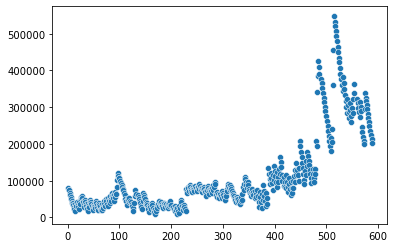

<Figure size 3600x3600 with 0 Axes>

In [41]:
sum = 0
sum_list = np.array([])
days = data['day_numbers'].unique()
days = np.sort(days)
for day in days:
    for i in range(len(data[data['day_numbers']==day]['day_numbers'])):
        sum = sum  + (np.array(data[data['day_numbers'] == day]['Quantity'])[i] * np.array(data[data['day_numbers'] == day]['Type'])[i]) 
    sum_list = np.append(sum_list, sum)
sns.scatterplot(x= days, y=sum_list)
plt.figure(figsize = (50,50))
plt.show()

## Cumulative un Toplamının Eklenmesi

In [42]:
sum = 0
sum_list = np.array([])
data = data.sort_values(by=['day_numbers'])
for i in range(len(data['day_numbers'])):
    sum = sum  + (np.array(data['Quantity'])[i] * np.array(data['Type'])[i]) 
    sum_list = np.append(sum_list, sum)
data['Cumulative'] = sum_list

In [43]:
data['FicheNoText'] = data['FicheNoText'].astype(str)

## Sadece Un Verisini Excel ve Csv Dosyalarına Kaydetme

In [44]:
file_name = "un_2021_2022.xlsx"
data.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [45]:
file_name = "un_2021_2022.csv"
data.to_csv(file_name)
print('DataFrame is written to CSV File successfully.')

DataFrame is written to CSV File successfully.


# Label Encoder

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['MovementType'] = le.fit_transform(data['MovementType'])
data['FicheNoText'] = le.fit_transform(data['FicheNoText'])
data['StockLink'] = le.fit_transform(data['StockLink'])
data['FicheNoText'] = pd.to_numeric(data['FicheNoText'])
data.head()

,BranchId,Type,Quantity,MovementType,FicheNoText,StockLink,day_of_year,day_numbers,month,day_of_month,week_of_year,day_of_week,is_wknd,Cumulative
0,90,1,78850.0,0,1241,18,0,0,12,31,53,3,0,78850.0
1655,90,-1,2900.0,5,0,1,2,2,1,2,53,5,1,75950.0
1656,90,-1,1850.0,5,1,2,2,2,1,2,53,5,1,74100.0
1657,90,-1,100.0,5,61,1,3,3,1,3,53,6,1,74000.0
1658,90,-1,3550.0,5,2,1,4,4,1,4,1,0,0,70450.0


Aşağıdaki satır, ols raporunda verilere göre backward elimination yapmak için kullanılabilir.

In [47]:
#data.drop(labels=['BranchId','Type'], axis = 1, inplace = True)

# Validasyon Seti Son %10

In [48]:
samples_len = len(data) * 0.1
sample_data = data.iloc[(-1 * int(samples_len)):-1]
data1 = sample_data.iloc[:,0:1]
data2 = sample_data.iloc[: ,2:]
columns=['BranchId','Quantity','MovementType','FicheNoText','StockLink','day_of_year','day_numbers','month','day_of_month','week_of_year',
        'day_of_week','is_wknd','Cumulative']
sample_others = pd.concat([data1, data2],ignore_index=True, axis = 1)
sample_others.columns = columns
data = data.iloc[:(len(data['Type']) - int(samples_len))]
#data = data.sort_values(by=['day_numbers'])

## Standard Scale

# Train Test Split

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size = 0.2)

# XG-Boost

In [51]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb_model.fit(X_train, y_train)
preds = xgb_model.predict(X_test)

# Light GBM

In [52]:
import lightgbm as lgb

In [53]:
lgb_model = lgb.LGBMRegressor(colsample_bytree=1,
                             learning_rate=0.01,
                             max_depth=9,
                             n_estimators = 1500)
lgb_model.fit(X_train, y_train)
predicts = lgb_model.predict(X_test)

## Random Forest Regressor

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [55]:
regressor = RandomForestRegressor(n_estimators=1600,
                                 min_samples_split=5,
                                 min_samples_leaf=1,
                                 max_features='auto',
                                 max_depth=10,
                                 bootstrap=True)
regressor.fit(X_train, y_train)
rfg_pred = regressor.predict(X_test)

# R2 SCORE

In [56]:
print('LİGHT-GBM R2 Score: ',r2_score(y_test, predicts))
print('XG-Boost R2 Score: ',r2_score(y_test, preds))
print('Random Forest Regressor R2 Score: ',r2_score(y_test, rfg_pred))

LİGHT-GBM R2 Score:  0.9940059519406398
XG-Boost R2 Score:  0.9907343383132406
Random Forest Regressor R2 Score:  0.9937166359368123


##  MAE SCORE

In [57]:
print('LİGHT-GBM MAE: ',mean_absolute_error(y_test, predicts))
print('XG-BOOST MAE: ',mean_absolute_error(y_test, preds))
print('Random Forest Regressor MAE: ',mean_absolute_error(y_test, rfg_pred))

LİGHT-GBM MAE:  5716.380477817912
XG-BOOST MAE:  6030.721053269045
Random Forest Regressor MAE:  5702.978781469415


# Mean Squared Error

In [58]:
print('LİGHT-GBM MSE Score:',np.sqrt(mean_squared_error(y_test,predicts)))
print('XG-BOOST MSE Score:',np.sqrt(mean_squared_error(y_test,preds)))
print('RANDOM FOREST MSE Score:',np.sqrt(mean_squared_error(y_test,rfg_pred)))

LİGHT-GBM MSE Score: 8949.656324425381
XG-BOOST MSE Score: 11127.16344593293
RANDOM FOREST MSE Score: 9163.098600160616


# Classification

In [59]:
types = data.iloc[:, 1:2]
data1 = data.iloc[:,0:1]
data2 = data.iloc[: ,2:]
columns=['BranchId','Quantity','MovementType','FicheNoText','StockLink','day_of_year','day_numbers','month','day_of_month','week_of_year',
        'day_of_week','is_wknd','Cumulative']
others = pd.concat([data1, data2],ignore_index=True, axis = 1)
others.columns = columns

In [60]:
X_train, X_test, y_train, y_test = train_test_split(others, types, test_size = 0.2)

In [61]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb_model.fit(X_train, y_train)
preds = xgb_model.predict(X_test)

[13:08:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [62]:
import lightgbm as lgb

In [63]:
lgb_model = lgb.LGBMClassifier(colsample_bytree=1,
                             learning_rate=0.01,
                             max_depth=9,
                             n_estimators = 1500)
lgb_model.fit(X_train, y_train)
predicts = lgb_model.predict(X_test)

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [65]:
classifier = RandomForestClassifier(n_estimators=1600,
                                 min_samples_split=5,
                                 min_samples_leaf=1,
                                 max_features='auto',
                                 max_depth=10,
                                 bootstrap=True)
classifier.fit(X_train, y_train)
cls_pred = classifier.predict(X_test)

In [66]:
print('LİGHT-GBM Accuracy Score: ',accuracy_score(y_test, predicts))
print('XG-Boost Accuracy Score: ',accuracy_score(y_test, preds))
print('Random Forest Classifier Accuracy Score: ',accuracy_score(y_test, cls_pred))

LİGHT-GBM Accuracy Score:  0.998719590268886
XG-Boost Accuracy Score:  0.998719590268886
Random Forest Classifier Accuracy Score:  0.998719590268886


In [67]:
for i in range(len(sample_data['Cumulative']) - 1):
    if sample_data['Cumulative'].iloc[i + 1] > sample_data['Cumulative'].iloc[i]:
        print('Alınan miktar : ', (np.abs(sample_data['Cumulative'].iloc[i + 1] - sample_data['Cumulative'].iloc[i])), 
              '| Gün: ', sample_data['day_numbers'].iloc[i + 1],
             'index',sample_data.index[i + 1],
             '| Önceki Miktar:',sample_data['Cumulative'].iloc[i],
             '| Sonraki Miktar:',sample_data['Cumulative'].iloc[i +1])    

Alınan miktar :  27000.0 | Gün:  532 index 3333 | Önceki Miktar: 339083.70559999975 | Sonraki Miktar: 366083.70559999975
Alınan miktar :  27000.0 | Gün:  532 index 2317 | Önceki Miktar: 355383.70559999975 | Sonraki Miktar: 382383.70559999975
Alınan miktar :  27000.0 | Gün:  540 index 2365 | Önceki Miktar: 283583.70559999975 | Sonraki Miktar: 310583.70559999975
Alınan miktar :  27000.0 | Gün:  540 index 3381 | Önceki Miktar: 299483.70559999975 | Sonraki Miktar: 326483.70559999975
Alınan miktar :  27000.0 | Gün:  545 index 3334 | Önceki Miktar: 269883.70559999975 | Sonraki Miktar: 296883.70559999975
Alınan miktar :  27000.0 | Gün:  545 index 2318 | Önceki Miktar: 285583.70559999975 | Sonraki Miktar: 312583.70559999975
Alınan miktar :  27000.0 | Gün:  550 index 2350 | Önceki Miktar: 256248.21499999997 | Sonraki Miktar: 283248.21499999997
Alınan miktar :  27000.0 | Gün:  550 index 3366 | Önceki Miktar: 280148.21499999997 | Sonraki Miktar: 307148.21499999997
Alınan miktar :  27000.0 | Gün: 

In [68]:
regressor2 = RandomForestRegressor(n_estimators=1600,
                                 min_samples_split=5,
                                 min_samples_leaf=1,
                                 max_features='auto',
                                 max_depth=10,
                                 bootstrap=True)
regressor2.fit(data.iloc[:, :-1], data.iloc[:, -1])
rfg_pred = regressor2.predict(sample_others)
cls_pred = classifier.predict(sample_others)
for i in range(len(rfg_pred) - 1):
    if (cls_pred[i] == 1) & (rfg_pred[i + 1] > rfg_pred[i]):
            print('Alınan miktar: ',(rfg_pred[i + 1] - rfg_pred[i]), 
                  '|Gün:', sample_data['day_numbers'].iloc[i],
                  '|index:',sample_data.index[i],
                 '|Önceki Miktar:',rfg_pred[i], 
                  '|Sonraki Miktar:', rfg_pred[i + 1])

Alınan miktar:  1407.144072277566 |Gün: 532 |index: 3333 |Önceki Miktar: 33779.24071674934 |Sonraki Miktar: 35186.3847890269
Alınan miktar:  1408.2447921213534 |Gün: 532 |index: 2317 |Önceki Miktar: 33779.24071674934 |Sonraki Miktar: 35187.48550887069
Alınan miktar:  1333.3588476286677 |Gün: 540 |index: 2365 |Önceki Miktar: 34479.70027212254 |Sonraki Miktar: 35813.05911975121
Alınan miktar:  1333.3588476286677 |Gün: 540 |index: 3381 |Önceki Miktar: 34479.70027212254 |Sonraki Miktar: 35813.05911975121
Alınan miktar:  1348.164590426779 |Gün: 545 |index: 3334 |Önceki Miktar: 34461.13706338293 |Sonraki Miktar: 35809.30165380971
Alınan miktar:  1348.164590426779 |Gün: 545 |index: 2318 |Önceki Miktar: 34461.13706338293 |Sonraki Miktar: 35809.30165380971
Alınan miktar:  1448.6254314420585 |Gün: 550 |index: 2350 |Önceki Miktar: 34016.13676453373 |Sonraki Miktar: 35464.76219597579
Alınan miktar:  1448.6254314420585 |Gün: 550 |index: 3366 |Önceki Miktar: 34016.13676453373 |Sonraki Miktar: 35464.

# Son %10'luk kısım predict

In [69]:
samples_len = len(data) * 0.1
sample_data = data.iloc[(-1 * int(samples_len)):-1]
data1 = sample_data.iloc[:,0:1]
data2 = sample_data.iloc[: ,2:]
columns=['BranchId','Quantity','MovementType','FicheNoText','StockLink','day_of_year','day_numbers','month','day_of_month','week_of_year',
        'day_of_week','is_wknd','Cumulative']
sample_others = pd.concat([data1, data2],ignore_index=True, axis = 1)
sample_others.columns = columns
data = data.iloc[:(len(data['Type']) - int(samples_len))]
#data = data.sort_values(by=['day_numbers'])

## Orjinal Kümülatif Veriler Üzerinden Kontrol Etmek

In [70]:
for i in range(len(sample_data['Cumulative']) - 1):
    if sample_data['Cumulative'].iloc[i + 1] > sample_data['Cumulative'].iloc[i]:
        print('Alınan miktar : ', (np.abs(sample_data['Cumulative'].iloc[i + 1] - sample_data['Cumulative'].iloc[i])), 
              '| Gün: ', sample_data['day_numbers'].iloc[i + 1],
             'index',sample_data.index[i + 1],
             '| Önceki Miktar:',sample_data['Cumulative'].iloc[i],
             '| Sonraki Miktar:',sample_data['Cumulative'].iloc[i +1])              

Alınan miktar :  25000.0 | Gün:  509 index 2313 | Önceki Miktar: 180593.73200000013 | Sonraki Miktar: 205593.73200000013
Alınan miktar :  25000.0 | Gün:  509 index 3329 | Önceki Miktar: 194543.73200000013 | Sonraki Miktar: 219543.73200000013
Alınan miktar :  25000.0 | Gün:  511 index 3352 | Önceki Miktar: 204293.73200000013 | Sonraki Miktar: 229293.73200000013
Alınan miktar :  25000.0 | Gün:  511 index 2336 | Önceki Miktar: 216593.73200000013 | Sonraki Miktar: 241593.73200000013
Alınan miktar :  27000.0 | Gün:  512 index 2337 | Önceki Miktar: 241593.73200000013 | Sonraki Miktar: 268593.73200000013
Alınan miktar :  27000.0 | Gün:  512 index 3379 | Önceki Miktar: 249123.73200000013 | Sonraki Miktar: 276123.73200000013
Alınan miktar :  27000.0 | Gün:  512 index 3330 | Önceki Miktar: 276123.73200000013 | Sonraki Miktar: 303123.73200000013
Alınan miktar :  27000.0 | Gün:  512 index 2314 | Önceki Miktar: 281603.73200000013 | Sonraki Miktar: 308603.73200000013
Alınan miktar :  27000.0 | Gün: 

## Makine Öğrenmesi Verileri Üzerinden Kontrol Etmek

In [71]:
regressor2 = RandomForestRegressor(n_estimators=1600,
                                 min_samples_split=5,
                                 min_samples_leaf=1,
                                 max_features='auto',
                                 max_depth=10,
                                 bootstrap=True)
regressor2.fit(data.iloc[:, :-1], data.iloc[:, -1])
rfg_pred = regressor2.predict(sample_others)
cls_pred = classifier.predict(sample_others)
for i in range(len(rfg_pred) - 1):
    if (cls_pred[i] == 1) & (rfg_pred[i + 1] > rfg_pred[i]):
            print('Alınan miktar: ',(rfg_pred[i + 1] - rfg_pred[i]), 
                  '|Gün:', sample_data['day_numbers'].iloc[i],
                  '|index:',sample_data.index[i],
                 '|Önceki Miktar:',rfg_pred[i], 
                  '|Sonraki Miktar:', rfg_pred[i + 1])

Alınan miktar:  2805.6314054885697 |Gün: 509 |index: 2313 |Önceki Miktar: 32752.4899954982 |Sonraki Miktar: 35558.12140098677
Alınan miktar:  2805.6314054885697 |Gün: 509 |index: 3329 |Önceki Miktar: 32752.4899954982 |Sonraki Miktar: 35558.12140098677
Alınan miktar:  2841.707700170391 |Gün: 511 |index: 3352 |Önceki Miktar: 32559.952746107363 |Sonraki Miktar: 35401.660446277754
Alınan miktar:  14.720134674680594 |Gün: 511 |index: 2336 |Önceki Miktar: 32559.952746107363 |Sonraki Miktar: 32574.672880782044
Alınan miktar:  2830.504895683207 |Gün: 512 |index: 2337 |Önceki Miktar: 32574.672880782044 |Sonraki Miktar: 35405.17777646525
Alınan miktar:  2830.504895683207 |Gün: 512 |index: 3330 |Önceki Miktar: 32574.672880782044 |Sonraki Miktar: 35405.17777646525
Alınan miktar:  2830.504895683207 |Gün: 512 |index: 3353 |Önceki Miktar: 32574.672880782044 |Sonraki Miktar: 35405.17777646525
Alınan miktar:  3303.5718129381603 |Gün: 512 |index: 2363 |Önceki Miktar: 32574.672880782044 |Sonraki Miktar: 

In [72]:
print('Random Forest Regressor R2 Score: ',r2_score(sample_data.iloc[:, -1], rfg_pred))
print('Random Forest Regressor MAE: ',mean_absolute_error(sample_data.iloc[:, -1], rfg_pred))
print('RANDOM Forest MSE Score:',np.sqrt(mean_squared_error(sample_data.iloc[:, -1],rfg_pred)))
print('Random Forest Classifier Accuracy Score: ',accuracy_score(sample_data.iloc[:, 1:2], cls_pred))

Random Forest Regressor R2 Score:  -15.00430356670056
Random Forest Regressor MAE:  387311.7554411764
RANDOM FOREST MSE Score: 400192.1825533203
Random Forest Classifier Accuracy Score:  1.0


## Backward Elimination

In [73]:
import statsmodels.api as sm 

In [74]:
r_ols = sm.OLS(endog=data.iloc[:, -1], exog=data.iloc[:, :-1])
r = r_ols.fit()

In [75]:
print(r.summary())

                                 OLS Regression Results                                
Dep. Variable:             Cumulative   R-squared (uncentered):                   0.786
Model:                            OLS   Adj. R-squared (uncentered):              0.786
Method:                 Least Squares   F-statistic:                              990.8
Date:                Fri, 26 Aug 2022   Prob (F-statistic):                        0.00
Time:                        13:08:59   Log-Likelihood:                         -42893.
No. Observations:                3512   AIC:                                  8.581e+04
Df Residuals:                    3499   BIC:                                  8.589e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

##### Üstekki raporda p değerine bakarak genelde 0.05'in üstünde olan columnları atabilirsin.

## GridSearch & RandomizedSearchCV

In [76]:
#from sklearn.model_selection import GridSearchCV

In [77]:
'''
lgbm_params={ "colsample_bytree" : [0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.9 , 1] ,
              "n_estimators" : [100 , 500, 1000, 1500 , 10000] , 
              "max_depth" : [ 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 ] , 
              "learning_rate" : [0,5, 0.1 , 0.01]}       
'''

'\nlgbm_params={ "colsample_bytree" : [0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.9 , 1] ,\n              "n_estimators" : [100 , 500, 1000, 1500 , 10000] , \n              "max_depth" : [ 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 ] , \n              "learning_rate" : [0,5, 0.1 , 0.01]}       \n'

In [78]:
'''
lgbm_cv_model=GridSearchCV(lgb_model ,
                           lgbm_params , 
                           cv=10 ,
                           n_jobs=-1,
                           verbose=2)
'''

'\nlgbm_cv_model=GridSearchCV(lgb_model ,\n                           lgbm_params , \n                           cv=10 ,\n                           n_jobs=-1,\n                           verbose=2)\n'

In [79]:
#lgbm_cv_model.fit(X_train , y_train)

In [80]:
#lgbm_cv_model.best_params_ 

In [81]:
'''
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
'''

"\nfrom sklearn.model_selection import RandomizedSearchCV\n# Number of trees in random forest\nn_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]\n# Number of features to consider at every split\nmax_features = ['auto', 'sqrt']\n# Maximum number of levels in tree\nmax_depth = [int(x) for x in np.linspace(10, 110, num = 11)]\nmax_depth.append(None)\n# Minimum number of samples required to split a node\nmin_samples_split = [2, 5, 10]\n# Minimum number of samples required at each leaf node\nmin_samples_leaf = [1, 2, 4]\n# Method of selecting samples for training each tree\nbootstrap = [True, False]\n# Create the random grid\nrandom_grid = {'n_estimators': n_estimators,\n               'max_features': max_features,\n               'max_depth': max_depth,\n               'min_samples_split': min_samples_split,\n               'min_samples_leaf': min_samples_leaf,\n               'bootstrap': bootstrap}\n"

In [82]:
'''
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
'''

'\n# Use the random grid to search for best hyperparameters\n# First create the base model to tune\n# Random search of parameters, using 3 fold cross validation, \n# search across 100 different combinations, and use all available cores\nrf_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)\n# Fit the random search model\nrf_random.fit(X_train, y_train)\n'

In [83]:
#rf_random.best_params_

## Anlık yakalanan en iyi Hiperparametreler

Random Forest = {'n_estimators': 1600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}
 
LİGHT-GBM = {'colsample_bytree': 1,
 'learning_rate': 0.01,
 'max_depth': 9,
 'n_estimators': 1500}

## Cross Validation

In [89]:
from sklearn.model_selection import cross_val_score

In [90]:
print(cross_val_score(regressor,data.iloc[:, :-1], data['Cumulative'], scoring = 'neg_mean_absolute_error', cv = 5))

[-16601.81176629 -16972.22944698 -18810.49889036 -16984.11176761
 -69055.36344737]


In [91]:
print(cross_val_score(lgb_model,others, others , scoring = 'neg_mean_absolute_error', cv = 5))

[nan nan nan nan nan]


In [92]:
print(cross_val_score(xgb_model,others,others , scoring = 'neg_mean_absolute_error', cv = 5))

[nan nan nan nan nan]
